# Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd
import plotly.express as px
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Read the data
df = pd.read_csv("hotel_bookings.csv")
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [3]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [4]:
df.shape

(119390, 32)

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Data Types:

1. Categorical: The data encompasses attributes such as hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, and reservation_status.

2. Numerical: This includes lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, and total_of_special_requests.

3. Ordinal: The dataset features arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, and reservation_status_date as ordinal attributes.

In [6]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())


hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [7]:
for col in df.describe(include = 'int64').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

is_canceled
[0 1]
--------------------------------------------------
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 

In [8]:
for col in df.describe(include = 'float64').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

children
[ 0.  1.  2. 10.  3. nan]
--------------------------------------------------
agent
[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 

# Check duplicate Values

In [9]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

print(f"There are {duplicate_rows.shape[0]} duplicate rows in the dataset.")

There are 31994 duplicate rows in the dataset.


The dataset contains 31,994 duplicate entries and some missing values. While typically such data should be removed, the possibility exists that multiple identical bookings occurred simultaneously. Without a unique "booking ID" to verify, we cannot confirm they are genuine duplicates. Therefore, deleting these rows might not be advisable.

# Check missing Values & NaN/Undefined Values

In [10]:
# Check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
# Counting missing values for the dataset
print(df.isnull().sum())

# country has 488 missing values, agent has 16340 missing values, and days_in_waiting_list has 112593 missing values.

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# String NULL or Undefined values to np.nan
# The provided code changes string values "NULL" and "Undefined" to numpy NaN values, 
# and then displays the count of NaN values for each column.
# The columns of 'meal', 'market_segment', 'distribution_channel' have "NULL" and "Undefined" , 
for col in df.columns:
    if df[col].dtype == 'object' and col != 'country':
        df.loc[df[col].str.contains('NULL'), col] = np.nan
        df.loc[df[col].str.contains('Undefined', na=False), col] = np.nan
null_series = df.isnull().sum()
print(null_series[null_series > 0])

children                     4
meal                      1169
country                    488
market_segment               2
distribution_channel         5
agent                    16340
company                 112593
dtype: int64


In [13]:
# Delete some missing values
# Column company holds 94% missing data, so we can drop that column.
cols_to_drop = ['company', 'agent']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [14]:
# Impute with the most frequent value (mode)
for column in ['country', 'meal', 'market_segment','children', 'distribution_channel']:
    most_frequent_value = df[column].mode()[0]
    df[column].fillna(most_frequent_value, inplace=True)


In [15]:
# Fill NaN/Null values by rule-set
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# EDA

In [16]:
# Create subset for resort hotel
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

In [17]:
# Create subset for city hotel
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

In [18]:
df['market_segment'].value_counts()

Online TA        56479
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

In [19]:
is_can = len(df[df['is_canceled']==1])
print("Percentage cancelation= ", is_can/len(df))
df['reservation_status'].value_counts(normalize=True)*100


Percentage cancelation=  0.37041628277075134


Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: reservation_status, dtype: float64

In [20]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

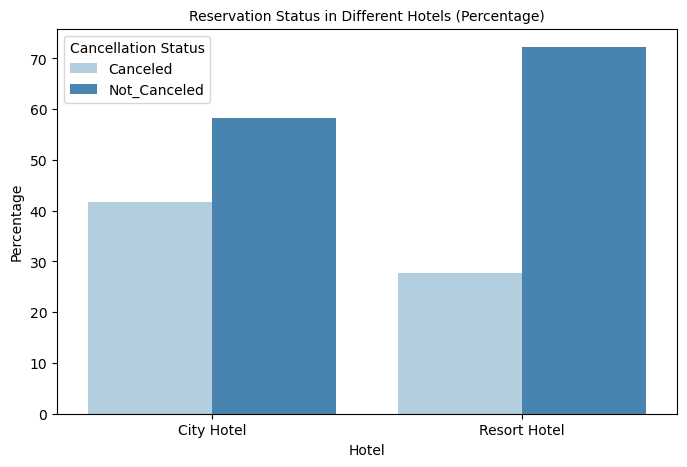

In [21]:
# We may want to know the reservation status in different hotels.
# First, we'll calculate the percentages
total_reservations = df.groupby('hotel').size()
canceled_reservations = df[df['is_canceled'] == 1].groupby('hotel').size()

percent_canceled = (canceled_reservations / total_reservations) * 100
percent_not_canceled = 100 - percent_canceled

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Hotel': percent_canceled.index,
    'Canceled': percent_canceled.values,
    'Not_Canceled': percent_not_canceled.values
}).melt(id_vars="Hotel", value_vars=['Canceled', 'Not_Canceled'], 
        var_name="Status", value_name="Percentage")

# Plotting
plt.figure(figsize=(8, 5))
ax1 = sns.barplot(x='Hotel', y='Percentage', hue='Status', data=plot_data, palette='Blues')
ax1.set_title('Reservation Status in Different Hotels (Percentage)', size=10)
ax1.set_xlabel('Hotel')
ax1.set_ylabel('Percentage')
ax1.legend(title='Cancellation Status', loc='upper left')
plt.show()

Observation: 

The City Hotel experiences a much higher cancellation rate compared to the Resort Hotel. On the other hand, guests who reserve at the Resort Hotel are more likely to retain their reservations. 

This difference might be attributed to several factors like the nature of the stay (business vs. leisure), pricing, cancellation policies, or seasonal trends.

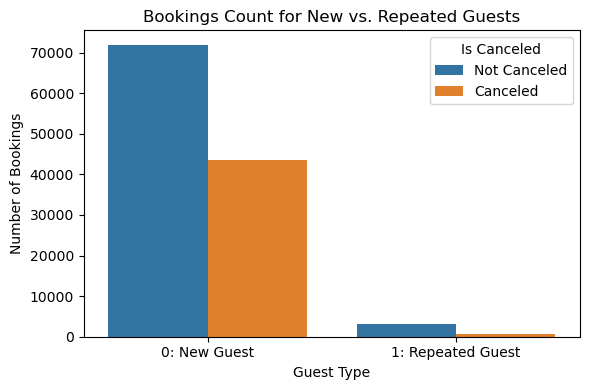

Cancelations among new guests= 37.79%
Cancelations among old guests= 14.49%


In [22]:
# Plot count of bookings for new and repeated guests, categorized by cancellation status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
plt.title("Bookings Count for New vs. Repeated Guests")
plt.xlabel("Guest Type")
plt.ylabel("Number of Bookings")
plt.xticks(ticks=[0, 1], labels=["0: New Guest", "1: Repeated Guest"])  # Setting custom x-axis labels
plt.legend(title="Is Canceled", labels=["Not Canceled", "Canceled"])
plt.tight_layout()
plt.show()

# Calculate the cancellation rate among new guests
new_guest_rate = df[(df['is_repeated_guest']==0)]['is_canceled'].mean()
print(f'Cancelations among new guests= {new_guest_rate:.2%}')

# Calculate the cancellation rate among repeated guests
old_guest_rate = df[(df['is_repeated_guest']==1)]['is_canceled'].mean()
print(f'Cancelations among old guests= {old_guest_rate:.2%}')


Observation: 

The chart shows most bookings are from new guests with a 37.79% cancellation rate. In comparison, repeated guests have a 14.65% cancellation rate. New guests are more prone to cancel, while repeated guests display greater commitment, indicating the value of guest loyalty in reducing cancellations.

In [23]:
# Adding new column 'has_prev_canceled' , 1 if the guest has previously canceled (previous_cancellations > 0)
# 0 if the guest has never canceled before (previous_cancellations = 0)
df['has_prev_canceled'] = (df['previous_cancellations'] > 0).astype(int)

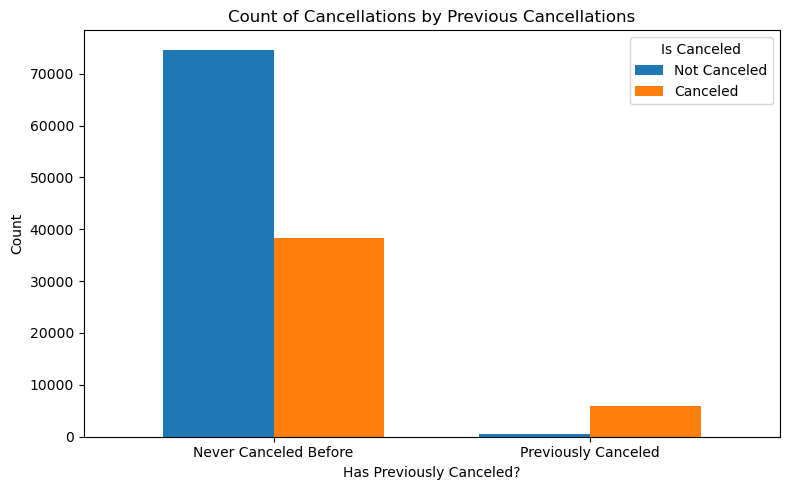

In [24]:
# Create a crosstab to get the count of is_canceled for each has_prev_canceled value
ct = pd.crosstab(df['has_prev_canceled'], df['is_canceled'])

# Plot the data using side-by-side bar chart
ax = ct.plot(kind='bar', figsize=(8, 5), width=0.7)
plt.ylabel('Count')
plt.xlabel('Has Previously Canceled?')
plt.xticks(ticks=[0,1], labels=['Never Canceled Before', 'Previously Canceled'], rotation=0)
plt.title('Count of Cancellations by Previous Cancellations')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])

# Display the plot
plt.tight_layout()
plt.show()


Observation: 

Most guests have no prior cancellations, and a majority of them retain their bookings. However, as the number of past cancellations increases, there's a heightened tendency for those guests to cancel their current reservations. This trend is particularly evident in guests with multiple previous cancellations, suggesting that past behavior is an indicator of future booking decisions.

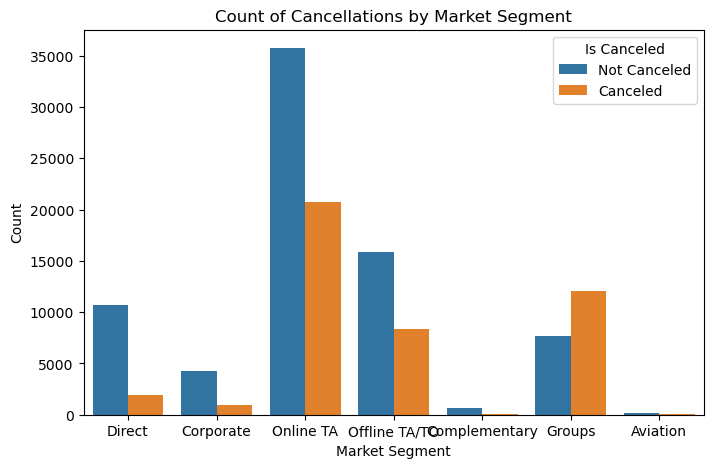

In [25]:
# Cancellation Status by Market Segment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='market_segment', hue='is_canceled')
plt.ylabel('Count')
plt.xlabel('Market Segment')
plt.title('Count of Cancellations by Market Segment')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


Online Travel Agents (TA) segment being the most prominent for bookings. Corporate bookings show a higher reliability with fewer cancellations compared to their volume, while the "Groups" segment sees a substantial cancellation rate despite its size. It's crucial for hoteliers to strategize based on these patterns to optimize occupancy and reduce cancellations.

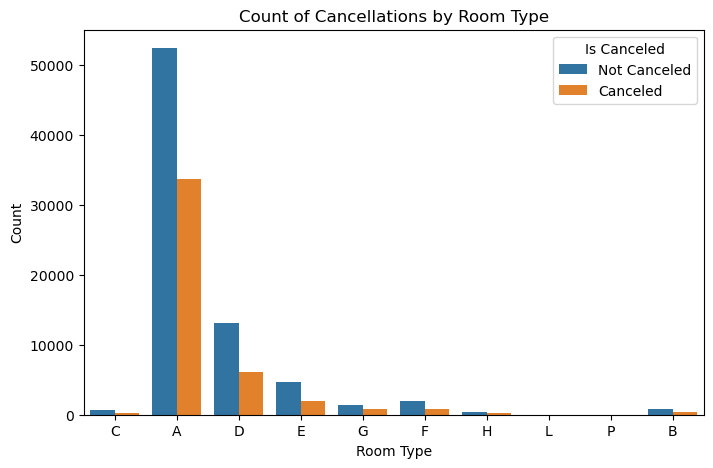

In [26]:
# Cancellation Status by Room Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='reserved_room_type', hue='is_canceled')
plt.ylabel('Count')
plt.xlabel('Room Type')
plt.title('Count of Cancellations by Room Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


Room type 'A' sees the highest booking count, but also a notable number of cancellations, whereas room type 'C' has almost no cancellations. It's essential to understand the preferences and reliability of bookings for each room type to effectively manage inventory and minimize cancellations.

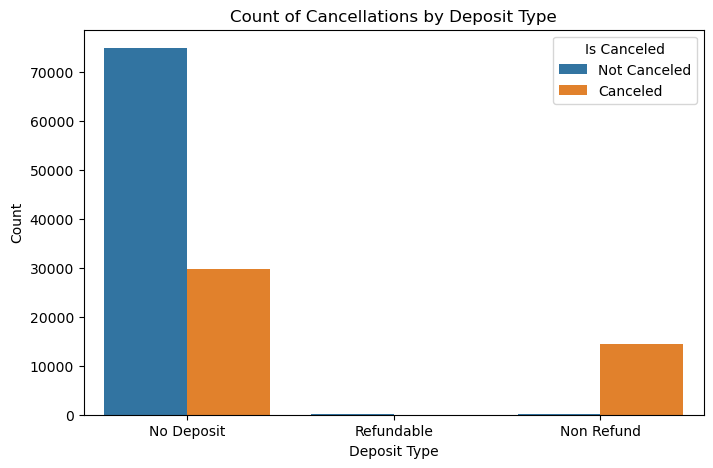

In [27]:
# Cancellation Status by Deposit Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.ylabel('Count')
plt.xlabel('Deposit Type')
plt.title('Count of Cancellations by Deposit Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


The majority of bookings are made with no deposit, and this category also witnesses the highest cancellations. Conversely, bookings made with a refundable deposit show a lower cancellation rate, indicating that customers might be more committed when a financial commitment is involved.

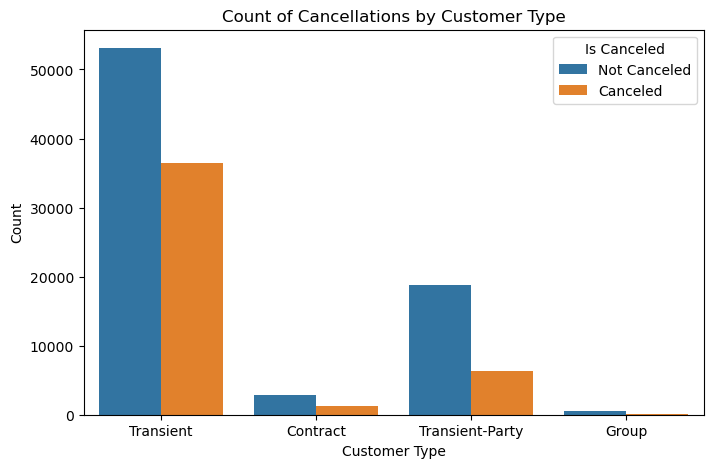

In [28]:
# Cancellation Status by Customer Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='customer_type', hue='is_canceled')
plt.ylabel('Count')
plt.xlabel('Customer Type')
plt.title('Count of Cancellations by Customer Type')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


Transient customers dominate the bookings and also have the highest cancellations. On the other hand, contract and group bookings have significantly lower cancellation rates, suggesting more reliable commitments from these segments.

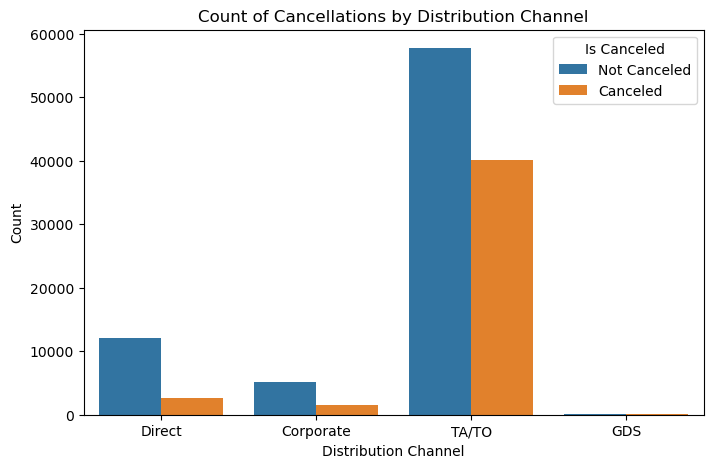

In [29]:
# Cancellation Status by Distribution Channel
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')
plt.ylabel('Count')
plt.xlabel('Distribution Channel')
plt.title('Count of Cancellations by Distribution Channel')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


The TA/TO (Travel Agents/Tour Operators) channel has the highest volume of bookings, but also a substantial number of cancellations. Conversely, the direct and corporate channels have fewer bookings and cancellations, indicating that these channels might offer a more consistent and reliable customer base.

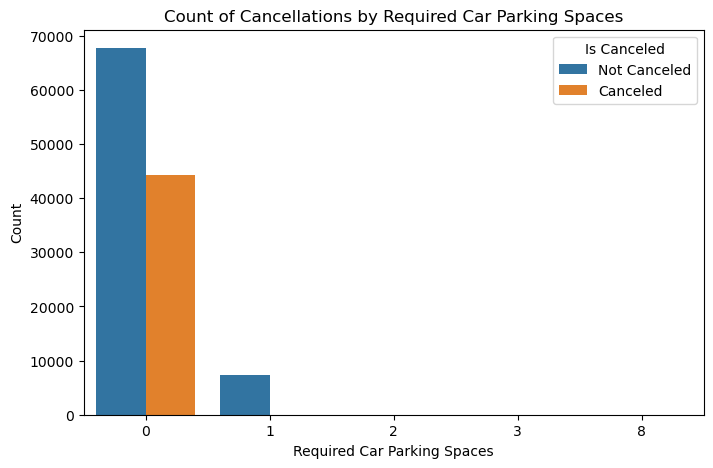

In [30]:
# Cancellation Status by Required Car Parking Spaces
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='required_car_parking_spaces', hue='is_canceled')
plt.ylabel('Count')
plt.xlabel('Required Car Parking Spaces')
plt.title('Count of Cancellations by Required Car Parking Spaces')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


Observation: 

Bookings with no required car parking spaces have a considerably higher cancellation rate than those with parking spaces. As the number of required parking spaces increases, the number of cancellations drastically decreases, indicating that guests requiring more parking spaces are less likely to cancel their bookings.

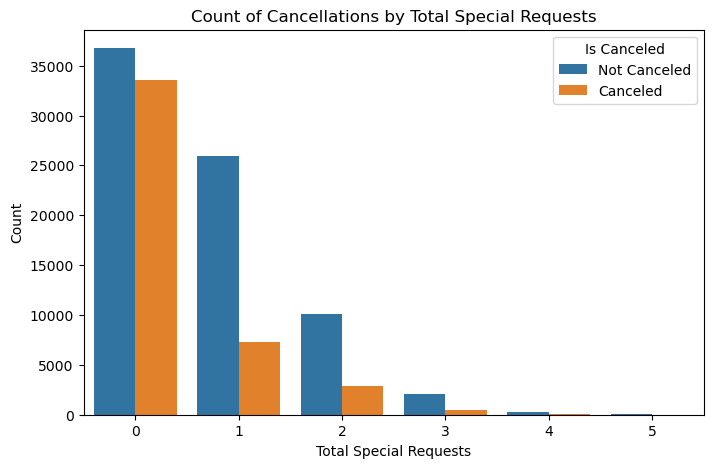

In [31]:
# Cancellation Status by Required Total Special Requests
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='total_of_special_requests', hue='is_canceled')
plt.ylabel('Count')
plt.xlabel('Total Special Requests')
plt.title('Count of Cancellations by Total Special Requests')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

Observation:

Bookings with fewer special requests (0 or 1) tend to have a higher cancellation rate compared to those with multiple special requests. As the number of special requests increases, the cancellation frequency appears to diminish, suggesting that guests with more specific needs or preferences are less likely to cancel their reservations.

# Data Visualization

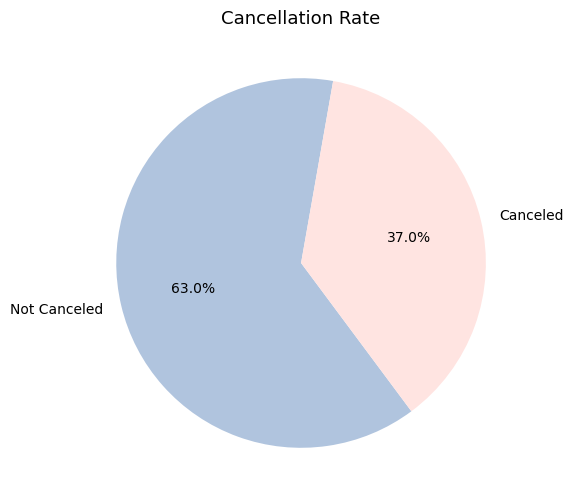

In [32]:
# Cancelation Rate

import matplotlib.pyplot as plt

# Data extraction
labels = ['Not Canceled', 'Canceled']
sizes = df['is_canceled'].value_counts().tolist()

# Colors
colors = ['lightsteelblue', 'mistyrose']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=80)
plt.title('Cancellation Rate', fontsize=13)
plt.show()

Observation: 
    
With a cancellation rate of 37%, which is notably high in the industry,  hotels may face revenue losses, underutilized capacity, and elevated administrative costs due to rebooking.

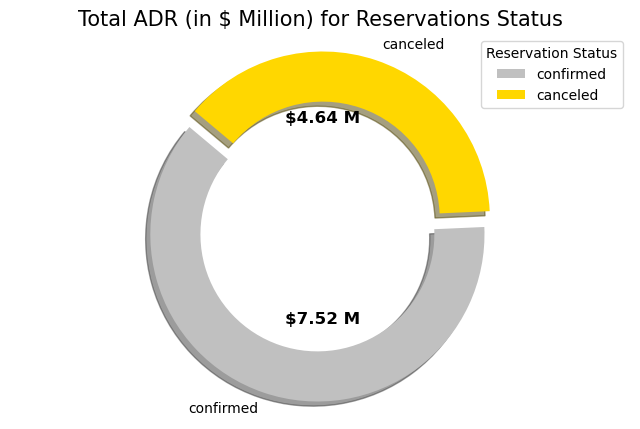

In [33]:

# Group by 'is_canceled' and calculate the total ADR
total_adr = df.groupby('is_canceled')['adr'].sum().reset_index()

# Rename the 'is_canceled' values for clarity in visualization
total_adr['status'] = total_adr['is_canceled'].replace({0: 'confirmed', 1: 'canceled'})
del total_adr['is_canceled']

# Convert ADR to $ Million
total_adr['adr_million'] = total_adr['adr'] / 1e6

# Pie Chart Visualization without percentage
colors = ['#C0C0C0', '#FFD700']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8, 5))

# Pie plot
wedges, texts = plt.pie(total_adr['adr_million'], explode=explode, labels=total_adr['status'], colors=colors, 
                        shadow=True, startangle=140, wedgeprops=dict(width=0.3))

# Position the ADR values in million and set their color to black
for i, (value, status) in enumerate(zip(total_adr['adr_million'], total_adr['status'])):
    if status == "confirmed":
        x, y = 0, -0.6  # directly below
    else:
        x, y = 0, 0.6  # directly above
    plt.annotate(f"${value:.2f} M", (x,y), ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Title and legend
plt.title('Total ADR (in $ Million) for Reservations Status', fontsize=15)
plt.legend(wedges, total_adr['status'], title="Reservation Status", loc="best")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Observation: 

Cancellations pose a multifaceted challenge for hotels. While the $4.64 million from canceled reservations is an evident revenue loss, the repercussions extend further. 

There are tangible costs associated with pre-arrival preparations and lost ancillary revenue from guest services. Furthermore, cancellations can upset pricing strategies. A pattern of frequent cancellations may also tarnish a hotel's reputation, hindering future bookings and customer loyalty.

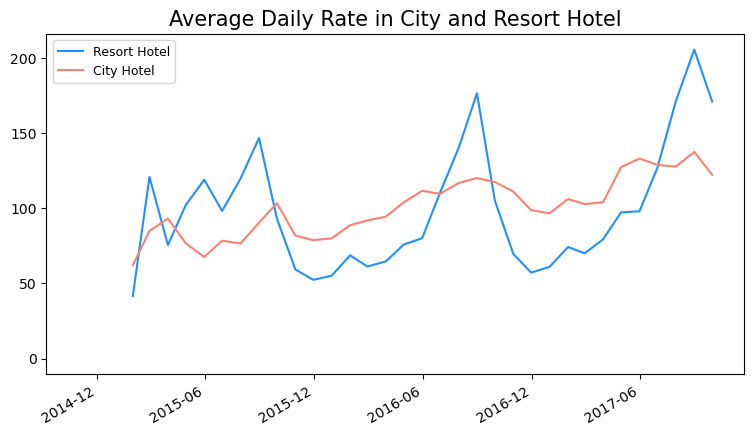

In [35]:
# Calculate the average Daily Rate in City and Resort Hotel

resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Group and get mean ADR by month or week for smoother lines
resort_hotel = resort_hotel.resample('M', on='reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.resample('M', on='reservation_status_date')[['adr']].mean()

# Plotting
plt.figure(figsize=(9,5))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=15)

plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel', color='dodgerblue')
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel', color='salmon')

# Improve date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Display every 6th month
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.legend(fontsize=9)
plt.show()

Observation: 

From 2014 to 2017, the graph illustrates the Average Daily Rate (ADR) for both City (pink) and Resort (blue) Hotels. Initially, the City Hotel's ADR is considerably lower than the Resort Hotel's, but over the years, it experiences a gradual increase, indicating rising demand or operational changes. The Resort Hotel's ADR fluctuates more seasonally, peaking notably in mid-2016. Both hotels display pronounced seasonal variations, with potential peak tourist seasons leading to higher rates.

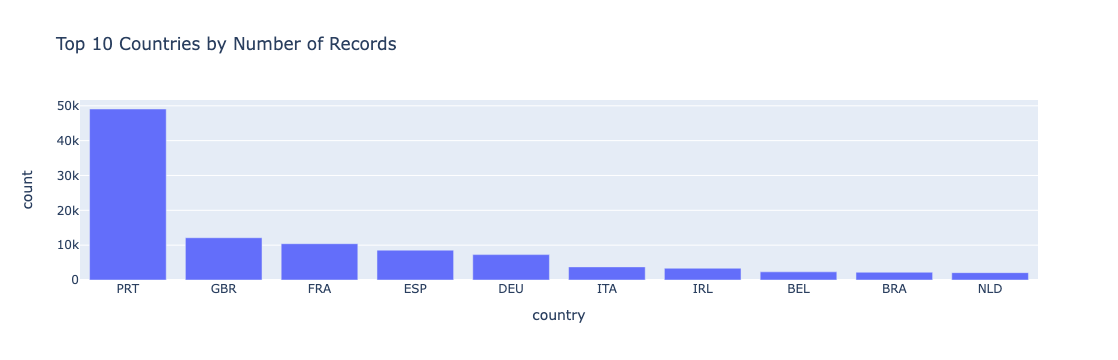

In [36]:
# Calculate the top 10 countries by number of records
top_10 = df['country'].value_counts().nlargest(10).reset_index()
top_10.columns = ['country', 'count']

# Bar chart visualization of the top 10 countries
# Specifying height and width to fit the screen
fig = px.bar(top_10, x='country', y='count', title='Top 10 Countries by Number of Records')
fig.show()


Observation: 

Portugal dominates the data with significantly higher records, while the majority of countries in the top 10 are European, indicating a possible Euro-centric context or higher activity/reporting from these nations. Brazil's presence as the lone South American country suggests its unique significance in the dataset.

In [37]:
# Extract month
df['month'] = df['reservation_status_date'].dt.month

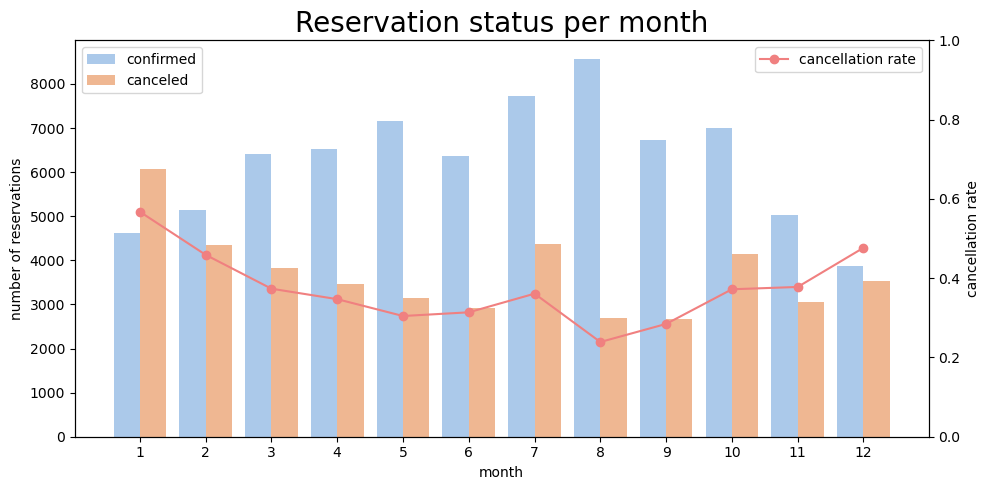

In [43]:
# Creating a column for textual representation of 'is_canceled'
df['reservation_status'] = df['is_canceled'].replace({0: 'confirmed', 1: 'canceled'})

# Create a pivot table to calculate cancellation rate
pivot_df = df.groupby(['month', 'is_canceled']).size().unstack().reset_index()
pivot_df.columns = ['month', 'confirmed', 'canceled']
pivot_df['cancellation_rate'] = pivot_df['canceled'] / (pivot_df['canceled'] + pivot_df['confirmed'])

# Plotting
plt.figure(figsize=(10, 5))

# Using a lighter palette for bars: pastel
palette = sns.color_palette("pastel", 2)

# Bar chart for reservations
ax1 = sns.countplot(x='month', hue='reservation_status', data=df, palette=palette)

# Line plot for cancellation rate
ax2 = ax1.twinx()
ax2.plot(pivot_df['month'] - 1, pivot_df['cancellation_rate'], color='lightcoral', marker='o', label='cancellation rate')
ax2.set_ylabel('cancellation rate')
ax2.set_ylim(0, 1)  # Setting y limit for cancellation rate

# Setting labels and title
plt.title('Reservation status per month', size=20)
ax1.set_xlabel('month')
ax1.set_ylabel('number of reservations')

# Adjusting legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Observation: 

The graph depicts monthly reservation status, showing peaks in reservations during May, July, August, and October, with a notable drop in December. Despite high bookings in May, the cancellation rate remains stable, while the end of the year sees a rise in the cancellation rate. This suggests high demand in specific months and potential end-of-year uncertainties influencing booking behaviors.

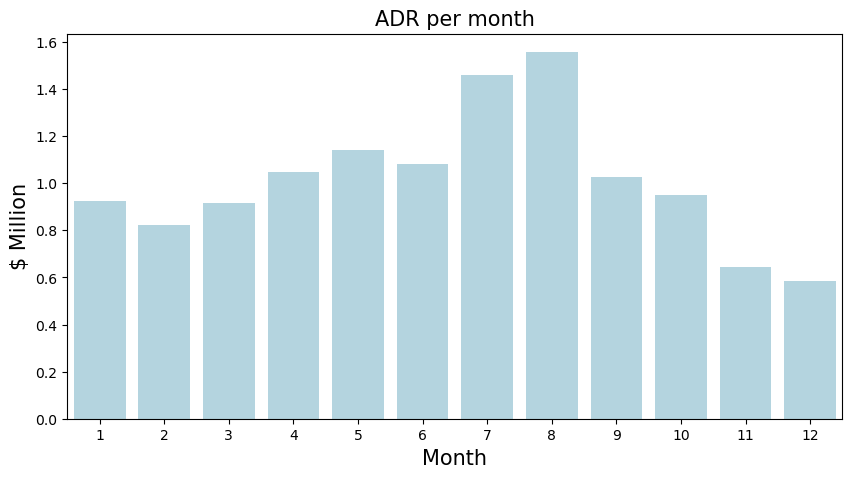

In [44]:
# Convert ADR to $ Million
df['adr_million'] = df['adr'] / 1e6

# Data Preparation for all guests
adr_per_month_all = df.groupby('month')[['adr_million']].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 5))
plt.title('ADR per month', fontsize=15)
sns.barplot(x='month', y='adr_million', data=adr_per_month_all, color='lightblue')
plt.ylabel('$ Million', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.show()


Observation: 

The visualization depicts the Average Daily Rate (ADR) per month in $ Million, showing a clear seasonality. The highest ADR, exceeding $1.2 Million, occurs around August, while there's a notable decline towards the year's end, especially in months 10 to 12. Mid-year months generally have elevated ADRs compared to the start and conclusion of the year.

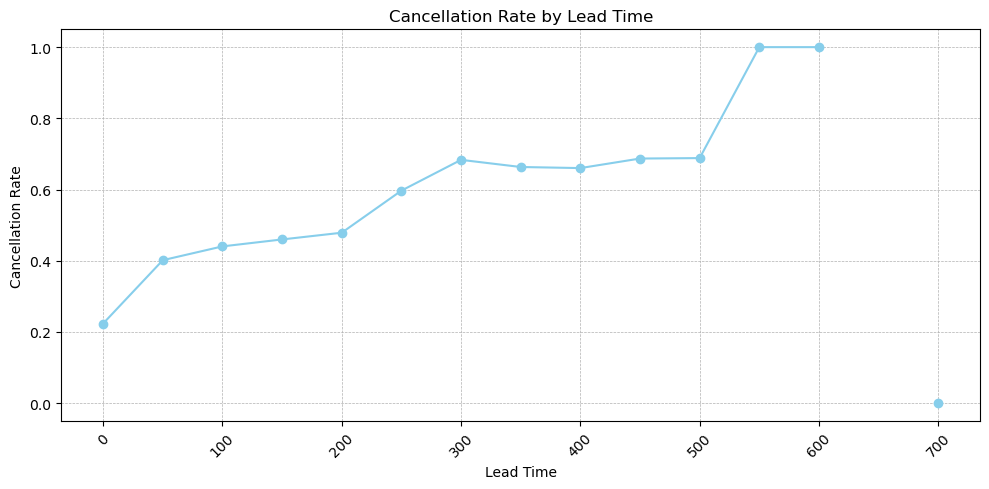

In [46]:
# Bin the lead_time into intervals
bin_size = 50
bins = np.arange(0, df['lead_time'].max() + bin_size, bin_size)
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=bins[:-1], right=False)

# Group by the binned lead_time and calculate the cancellation rate
cancel_rate = df.groupby('lead_time_bin')['is_canceled'].mean()

# Plot the cancellation rate using a line plot
plt.figure(figsize=(10,5))
cancel_rate.plot(kind='line', color='skyblue', marker='o')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Observation: 

The graph shows that as the gap between booking and stay date (lead time) expands, cancellations increase, with a notable surge around 600 days. This suggests reservations made significantly in advance are less stable, with those made nearly two years ahead being particularly prone to cancellation.

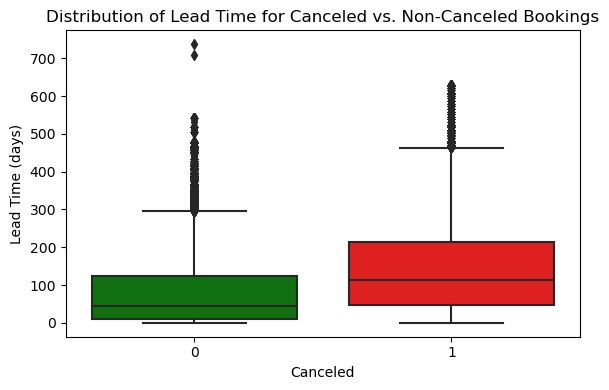

In [50]:
# Lead time and cancelation status
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='is_canceled', y='lead_time', palette=["green", "red"])
plt.title('Distribution of Lead Time for Canceled vs. Non-Canceled Bookings')
plt.xlabel('Canceled')
plt.ylabel('Lead Time (days)')
plt.tight_layout()
plt.show()

Bookings with longer lead times seem to have a higher likelihood of being canceled compared to those with shorter lead times.

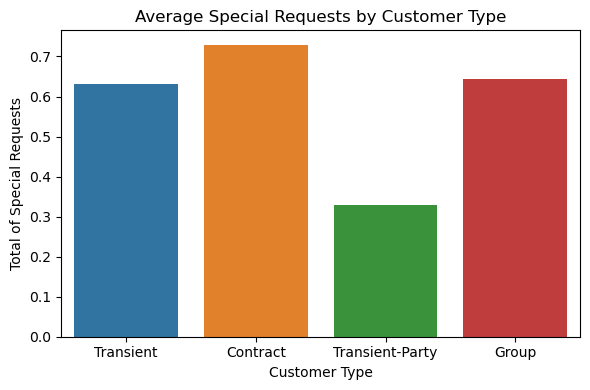

In [51]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='customer_type', y='total_of_special_requests', ci=None)
plt.ylabel('Total of Special Requests')
plt.xlabel('Customer Type')
plt.title('Average Special Requests by Customer Type')
plt.tight_layout()
plt.show()



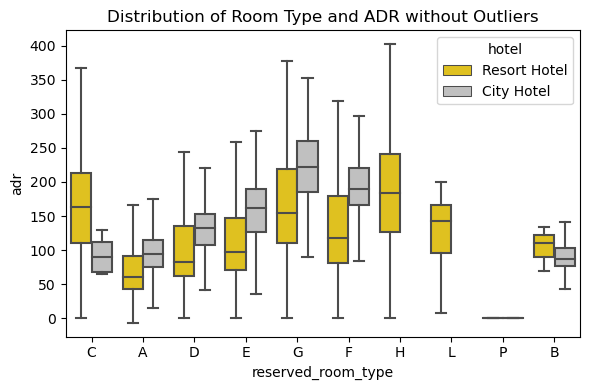

In [52]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="reserved_room_type", y="adr", hue="hotel", data=df, showfliers=False, palette={"Resort Hotel": "#FFD700", "City Hotel": "#C0C0C0"})
plt.title('Distribution of Room Type and ADR without Outliers')
plt.tight_layout()
plt.show()

Observation:
    
1. The ADR for Resort Hotel rooms, in general, tends to be higher than that of City Hotel rooms across most room types.
2. Room type 'C' in the Resort Hotel has the broadest range in ADR, with a considerably high median compared to other room types.
3. Room type 'B' exhibits a notably low ADR for both hotel types, and there's a minimal overlap in ADR between the two hotel types for this room category.

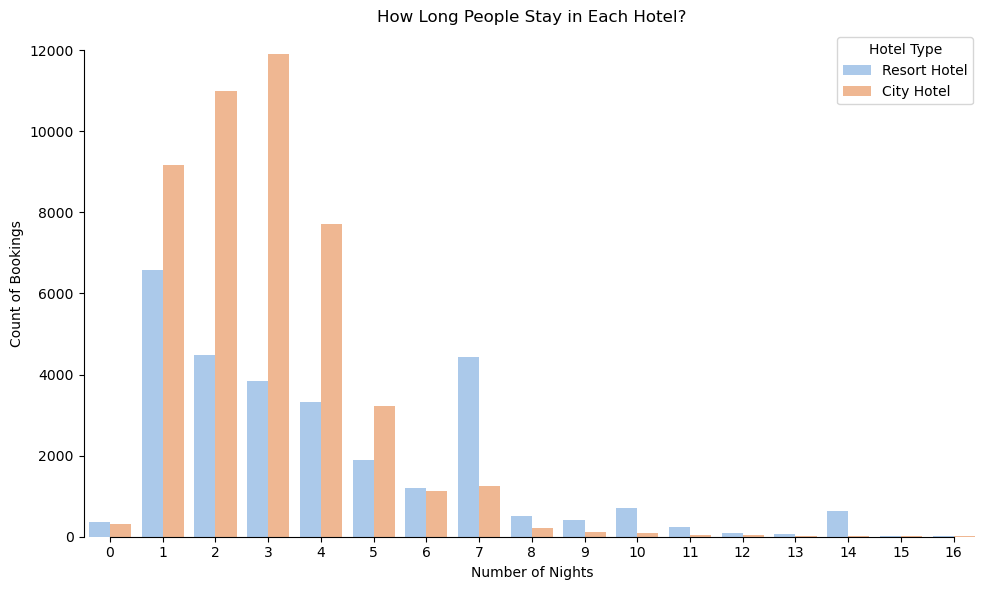

In [53]:
# How long people stay in each hotel?
# Adding total number of days stayed
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


# Filter the dataframe for non-canceled bookings
non_canceled = df[df['is_canceled'] == 0]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=non_canceled, x='total_stays', hue='hotel', palette="pastel")

# Setting title and labels
plt.title('How Long People Stay in Each Hotel?')
plt.xlabel('Number of Nights')
plt.ylabel('Count of Bookings')
plt.legend(title='Hotel Type', loc='upper right')

# Adjust the x-axis based on the data and cut at 16
plt.xlim(-0.5, 16.5)  # -0.5 and 16.5 are added to ensure the bars for 0 and 16 are fully visible
sns.despine(trim=True)

# Display the plot
plt.tight_layout()
plt.show()

For both types of hotels, the majority of guests stay for 1 to 4 nights. Specifically, 1-night stays are most common, followed by 2, 3, and 4-night stays. Resort Hotels witness a significant surge in 7-night stays, possibly indicating a popular week-long vacation choice. In contrast, City Hotels have fewer guests staying for extended durations, with a steady decrease observed after 4-night stays, and minimal bookings beyond 10 nights.

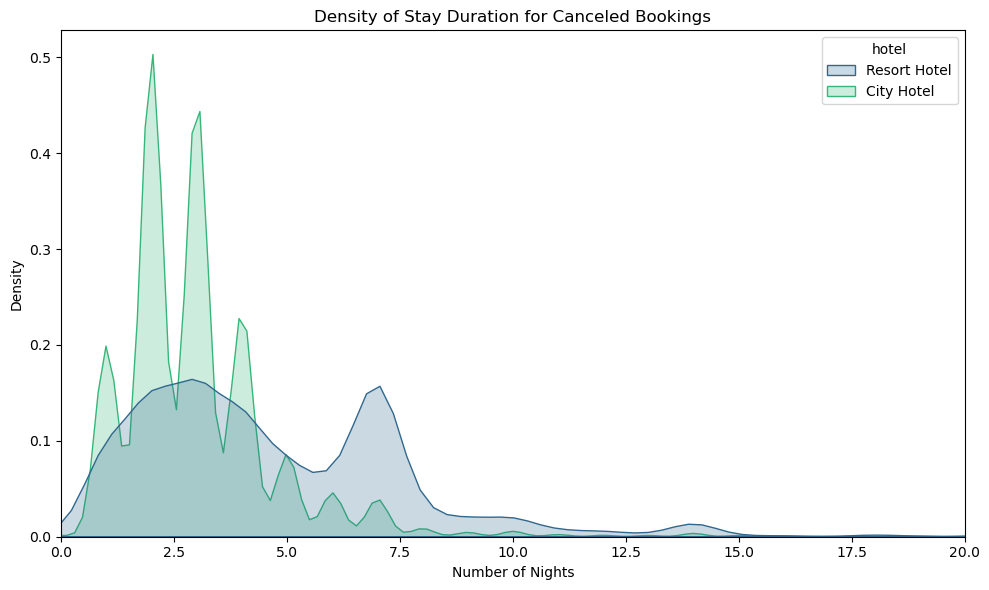

In [54]:
# Filter the dataframe for canceled bookings
canceled = df[df['is_canceled'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
sns.kdeplot(data=canceled, x='total_stays', hue='hotel', fill=True, common_norm=False, palette="viridis")

# Setting title and labels
plt.title('Density of Stay Duration for Canceled Bookings')
plt.xlabel('Number of Nights')
plt.ylabel('Density')

# Adjust the x-axis limit
plt.xlim(0, 20)  # Here's the change

# Display the plot
plt.tight_layout()
plt.show()

Observation:

1.Cancellations for the Resort Hotel are most frequent for stays around 0-10 nights, with a pronounced peak at just under 10 nights.
2.City Hotel cancellations have a more even distribution for durations up to 10 nights but show a significant peak around 1-2 nights.

Beyond 15 nights, cancellations are notably rarer for both hotel types, with the frequency dropping considerably.



# Feature Engineering & Selection

In [55]:
df['children'] = df['children'].astype(int)
df['children'].dtype  # change data type from float to int

dtype('int64')

In [56]:
# Creating the new attribute
# Calculating total guests for each record
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'] = df['total_guests'].astype(int)
df['total_guests'].dtype

dtype('int64')

In [57]:
zero_guests = df[df['total_guests'] == 0]

if len(zero_guests) > 0:
    print(f"There are {len(zero_guests)} entries with 0 total guests.")
else:
    print("There are no entries with 0 total guests.")

There are 180 entries with 0 total guests.


In [58]:
# Some data points include zero Total Guests, therefore I dropped them
df = df[df['total_guests'] != 0]

In [59]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [60]:
# Adding total bookings column
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

In [61]:
df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

In [62]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])


In [63]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [64]:
# Categorize into numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'has_prev_canceled', 'month', 'adr_million', 'total_stays', 'total_guests', 'total_bookings']
Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'lead_time_bin', 'arrival_date']


In [65]:
# Output the dataset
df.to_csv('Output.csv', index=False)


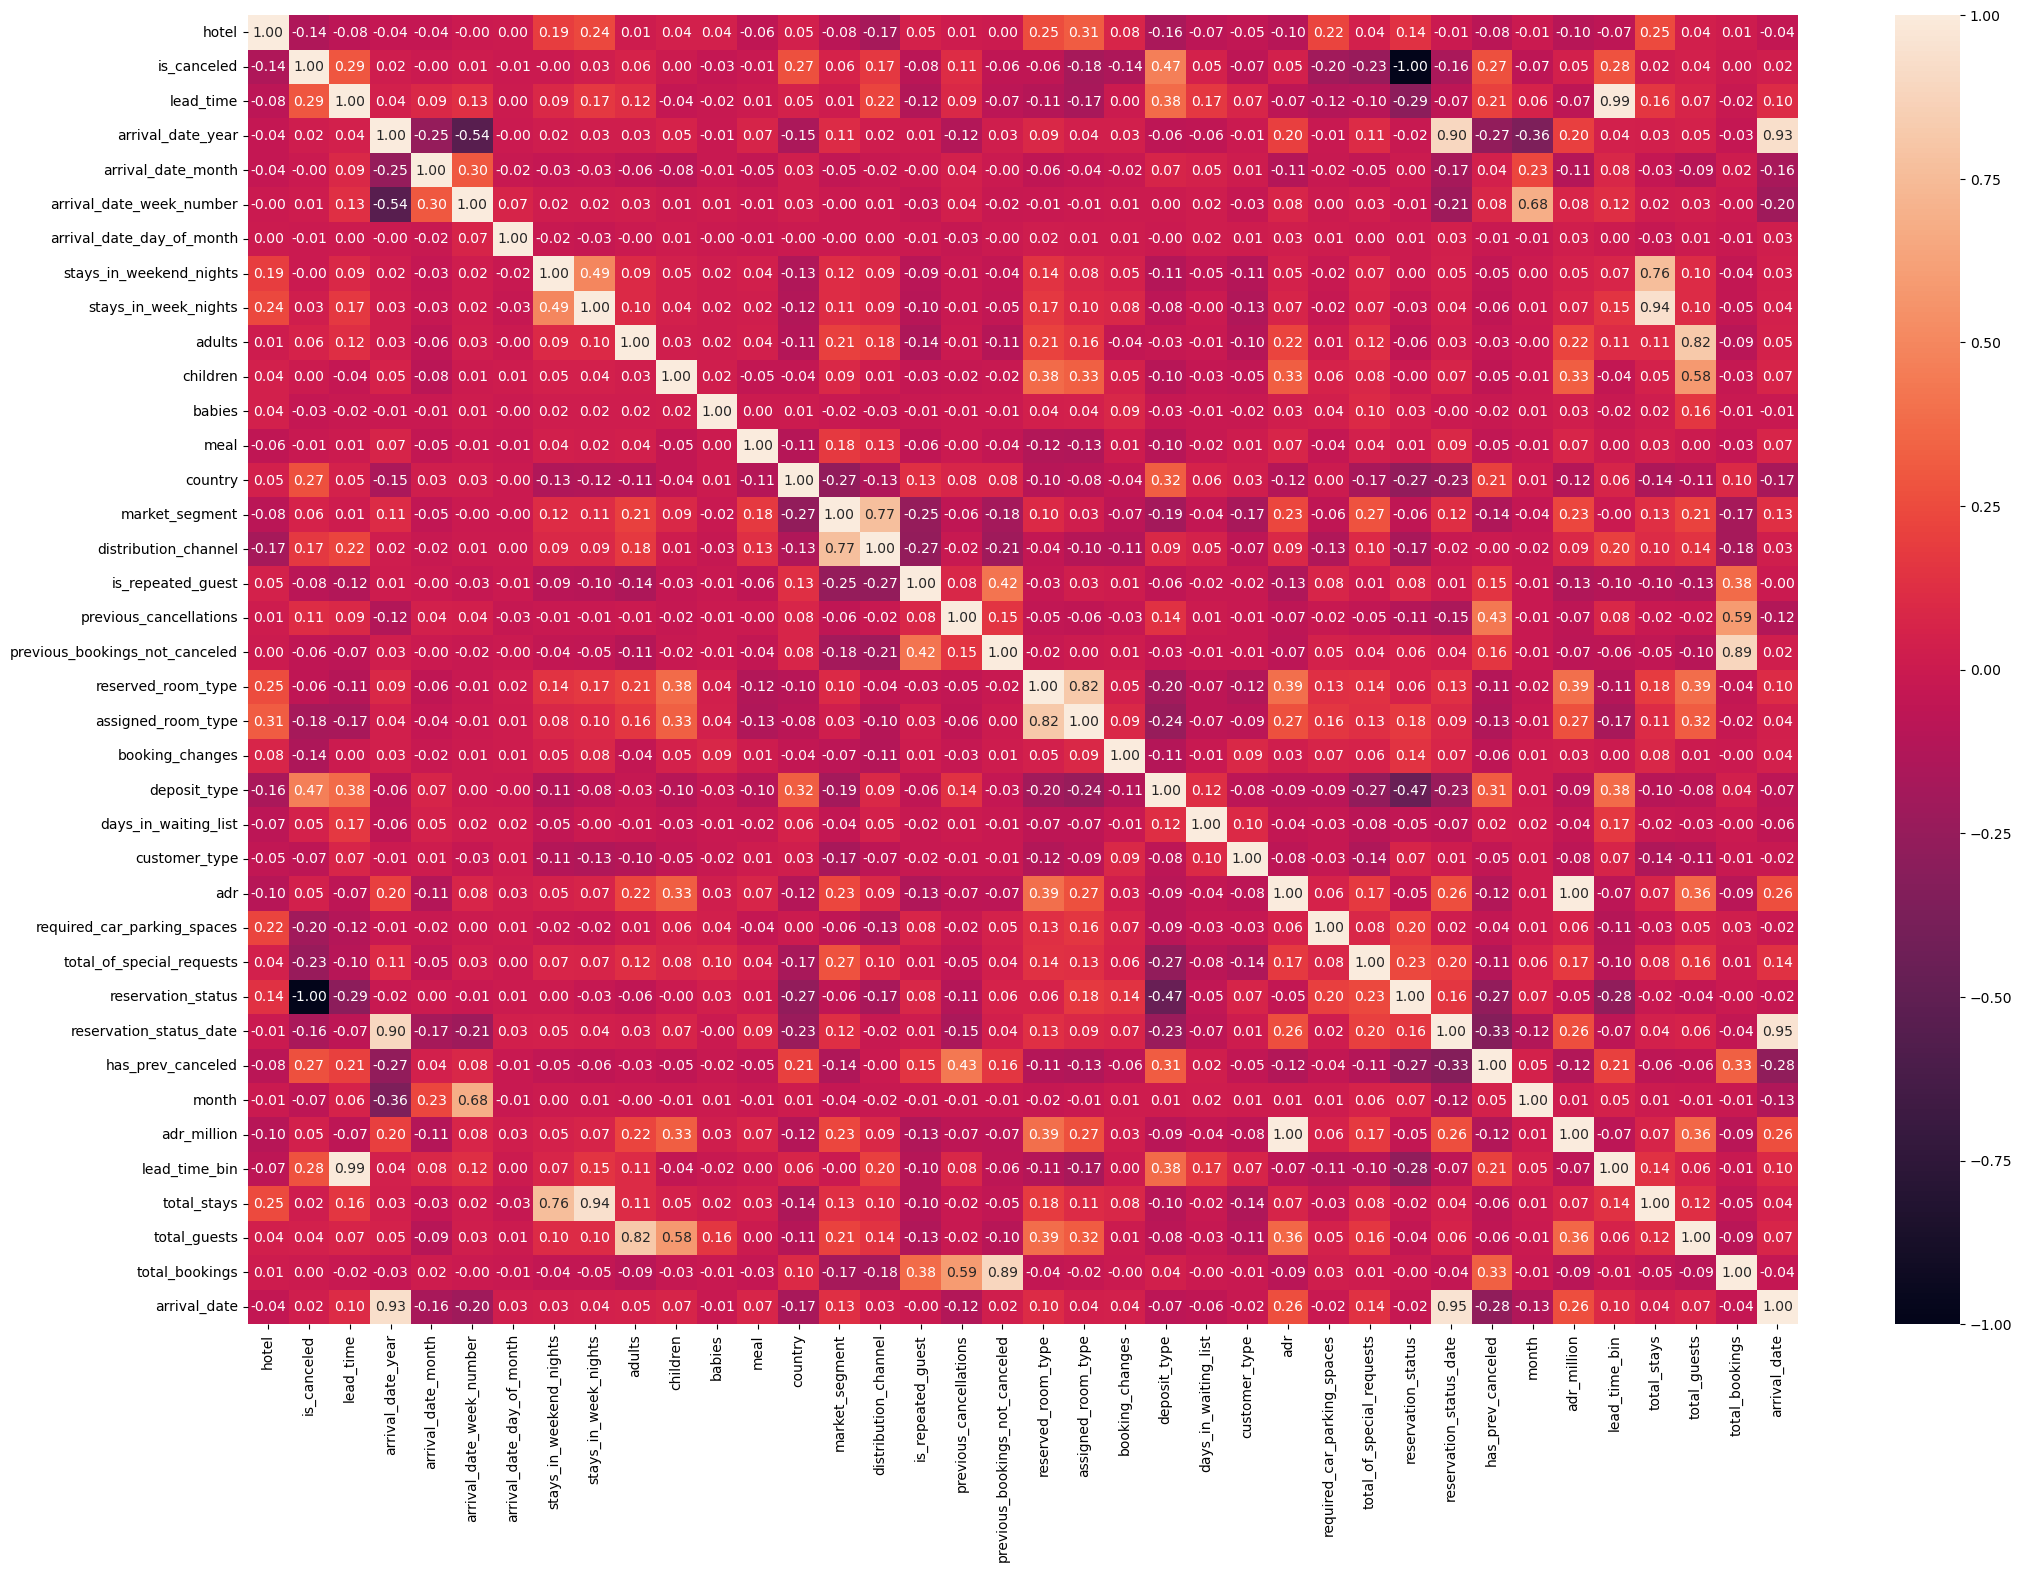

In [66]:
data = df.copy()
le = LabelEncoder()

categoricals = [
    'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'lead_time_bin', 'arrival_date'
]

for col in categoricals:
    data[col] = le.fit_transform(data[col])
plt.figure(figsize=(25, 17))
sns.heatmap(data.corr(), annot=True, fmt='.2f');

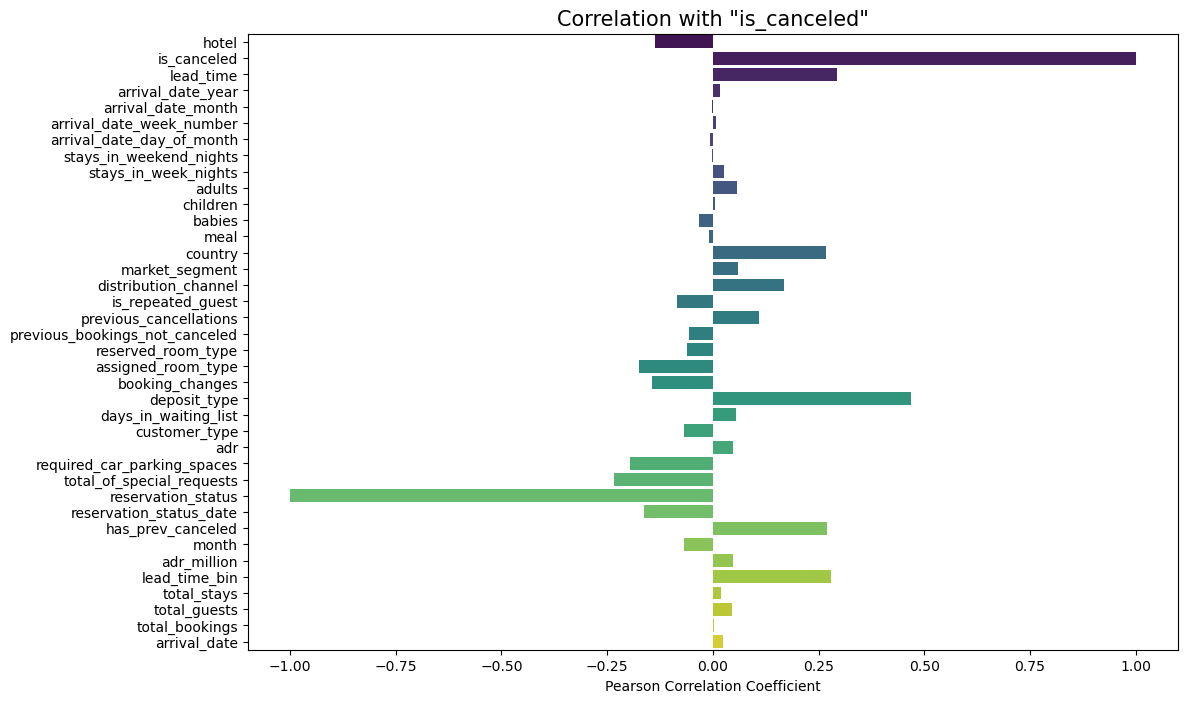

In [67]:
# Compute correlations
corr = data.corr(method='pearson')['is_canceled'][:]

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(y=corr.index, x=corr.values, palette="viridis")
plt.title('Correlation with "is_canceled"', fontsize=15)
plt.xlabel('Pearson Correlation Coefficient')
plt.show()

In [68]:
correlation = data.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

reservation_status                1.000000
is_canceled                       1.000000
deposit_type                      0.468676
lead_time                         0.292876
lead_time_bin                     0.279523
has_prev_canceled                 0.271021
country                           0.268057
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
assigned_room_type                0.175843
distribution_channel              0.167674
reservation_status_date           0.162179
booking_changes                   0.144832
hotel                             0.137082
previous_cancellations            0.110139
is_repeated_guest                 0.083745
month                             0.068550
customer_type                     0.068206
reserved_room_type                0.062216
market_segment                    0.059403
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr_million

Observation: 
* Strong Correlations with 'is_canceled':
1. Deposit type has a strong correlation with cancelation(0.47)
2. Bookings made well in advance tend to be canceled more often, with a correlation of 0.29. 
3. Reservations with previous cancellations show a 0.27 correlation to future cancellations. 
4. Interestingly, bookings requiring parking spaces (-0.22) or having higher booking change (-0.14) are less prone to cancellations. 
5. Distribution Channel: A positive correlation of 0.17, which might indicate certain distribution channels experience more cancellations than others.
6. Additionally, those with more special requests are less likely to cancel, with a correlation of -0.23.
7. Market Segment: It has a positive correlation of 0.08, which suggests certain market segments might have slightly higher cancellation rates.

*Multicollinearity:
1. reserved_room_type and assigned_room_type: These two have a correlation value of about 0.82 with each other, suggesting potential redundancy.
2. Among arrival_date_year, arrival_date_month, and arrival_date_day_of_month: These features have high inter-correlations, which can cause multicollinearity in modeling.
3. Lead_time and Lead_time_bin has redundancy.

*Decision on Columns:
1. Drop: Columns like total_bookings,arrival_date_month,stays_in_weekend_nights,children,arrival_date_day_of_month,  arrival_date_week_number, and meal have correlations close to zero with is_canceled, meaning they might not provide significant predictive value.
2. Address Multicollinearity: Based on the high correlation value of 0.82 between reserved_room_type and assigned_room_type, consider dropping one, like reserved_room_type. Also consider drop arrival_date_year, arrival_date_month.
3. Drop 'reservation_status'because it has a correlation of 1.0 with is_canceled. This indicates a perfect linear relationship. Using it as a feature when predicting is_canceled would be a classic case of data leakage, where our model would have access to information it shouldn't have during training.


In [69]:
data.drop(['total_bookings', 
           'arrival_date_month',
           'children',
           'arrival_date_day_of_month',  
           'arrival_date_week_number', 
           'meal',  
           'reserved_room_type', 
           'reservation_status',
           'reservation_status_date', 
           'stays_in_weekend_nights',
           'lead_time_bin',
           'adr_million',
           'country'],
          axis=1, inplace=True)

In [70]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'stays_in_week_nights', 'adults', 'babies', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'has_prev_canceled', 'month',
       'total_stays', 'total_guests', 'arrival_date'],
      dtype='object')

# Data Modeling

In [149]:
# Set a random seed for reproducibility
np.random.seed(42)

In [150]:

X = data.drop(['is_canceled'], axis=1)
y = data['is_canceled']


In [151]:
X.shape, y.shape

((119210, 24), (119210,))

In [152]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)


In [153]:
y_train.head(), y_test.head()

(117271    0
 103866    0
 2429      0
 85949     0
 55623     1
 Name: is_canceled, dtype: int64,
 115413    0
 110385    0
 59474     1
 67300     1
 88836     0
 Name: is_canceled, dtype: int64)

# Logistic Regression

In [154]:
# Defining the hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


In [155]:
# Logistic Regression with GridSearchCV for hyperparameter tuning
lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [156]:
# Selecting the best estimator and making predictions
best_lr = grid_search.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Evaluating the model
acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8055252635405307
Confusion Matrix : 
[[21305  1156]
 [ 5799  7503]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     22461
           1       0.87      0.56      0.68     13302

    accuracy                           0.81     35763
   macro avg       0.83      0.76      0.77     35763
weighted avg       0.82      0.81      0.79     35763



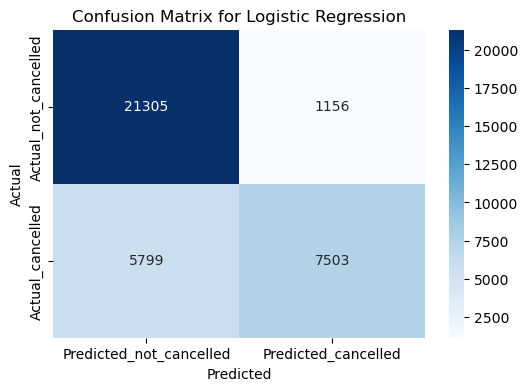

In [157]:
# Create the confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted_not_cancelled', 'Predicted_cancelled'], yticklabels=['Actual_not_cancelled', 'Actual_cancelled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')

# Show the plot
plt.show()

Interpretation:

Accuracy:
The accuracy score for the Logistic Regression model is approximately 0.81 means that the model correctly predicts the target variable is_canceled about 81% of the time on the test set.

Confusion Matrix:
1. True Positive (TP): 21305 bookings were correctly predicted as not canceled.
2. False Negative (FN): 1156 bookings were incorrectly predicted as canceled when they were not.
3. False Positive (FP): 5799 bookings were incorrectly predicted as not canceled when they were.
4. True Negative (TN): 7503 bookings were correctly predicted as canceled.

Classification Report:
For non-canceled bookings (0), the model's precision is 79%, recall is 95%, and F1-score is 86%. For canceled bookings (1), the precision is 87%, recall is 56%, and F1-score is 68%. The model is more accurate in predicting non-canceled bookings than canceled ones.

Insight:
1. The model is very good at identifying bookings that will not be canceled.
2. While the precision for predicting canceled bookings is high, the model struggles with recall, meaning it misses a significant portion of bookings that actually get canceled. This could be an area of improvement.


# Decision Tree

In [158]:
# Defining the hyperparameters
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [159]:
# setup the GridSearch with the model and hyperparameters
dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')



In [160]:
# Fit the grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [161]:
#Find the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [162]:
# Train the model using the best hyperparameters
best_dtc = DecisionTreeClassifier(random_state=42, **best_params)
best_dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       random_state=42)

In [163]:
# Evaluate the model
y_pred_dtc = best_dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree with best hyperparameters is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Decision Tree with best hyperparameters is : 0.9226295333165562
Confusion Matrix : 
[[21606   855]
 [ 1912 11390]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22461
           1       0.93      0.86      0.89     13302

    accuracy                           0.92     35763
   macro avg       0.92      0.91      0.92     35763
weighted avg       0.92      0.92      0.92     35763



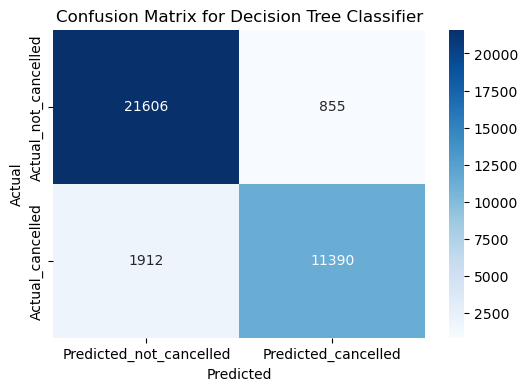

In [164]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted_not_cancelled', 'Predicted_cancelled'],
            yticklabels=['Actual_not_cancelled', 'Actual_cancelled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Interpretation:
    
Accuracy Score:
The model has an accuracy score of approximately 92%. This means that out of all predictions made by the model, 92% were correct.

Confusion Matrix:
1. True Positives for Class 0 (Actual=0, Predicted=0): 21606
2. False Positives for Class 1 (Actual=0, Predicted=1): 855
3. False Negatives for Class 0 (Actual=1, Predicted=0): 1912
4. True Positives for Class 1 (Actual=1, Predicted=1): 11390

Classification Report:
The model accurately predicted Class 0 in 92% of cases and correctly identified 96% of actual Class 0 instances, achieving an F1-score of 94%. For Class 1, it had a prediction accuracy of 93% and recognized 86% of actual instances, with an F1-score of 89%. The average values across both classes indicate a consistent performance with 92% precision, recall, and F1-score.

Insight:
While the model effectively classifies both classes, there's potential to improve the recall for class 1, which lags slightly behind its precision.


# Random Forest

In [165]:
# Define the hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}


In [166]:
# Initialize the RandomForestClassifier with a random state
rf_clf = RandomForestClassifier(random_state=42)

# Perform GridSearch for RandomForest
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


In [167]:
grid_search_rf.fit(X_train, y_train)

# Train and predict using the best model
best_rf_clf = grid_search_rf.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   3.8s
[CV] END ...................C=0.001, penalty=l2, solver=saga; total time=   3.5s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.8s
[CV] END ....................C=0.01, penalty=l2, solver=saga; total time=   3.4s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   4.5s
[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   4.1s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=  40.5s
[CV] END .....................C=100, penalty=l2, solver=saga; total time=   3.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.4s
[CV] E

In [168]:
# Calculate metrics for RandomForest
acc_rf = accuracy_score(y_test, y_pred_rf)
conf_rf = confusion_matrix(y_test, y_pred_rf)
clf_report_rf = classification_report(y_test, y_pred_rf)

# Print results for RandomForest
print(f"Accuracy Score of Random Forest with best hyperparameters: {acc_rf}")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Confusion Matrix for RandomForest: \n{conf_rf}")
print(f"Classification Report for RandomForest: \n{clf_report_rf}")


Accuracy Score of Random Forest with best hyperparameters: 0.9315773285238934
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix for RandomForest: 
[[21937   524]
 [ 1923 11379]]
Classification Report for RandomForest: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     22461
           1       0.96      0.86      0.90     13302

    accuracy                           0.93     35763
   macro avg       0.94      0.92      0.93     35763
weighted avg       0.93      0.93      0.93     35763



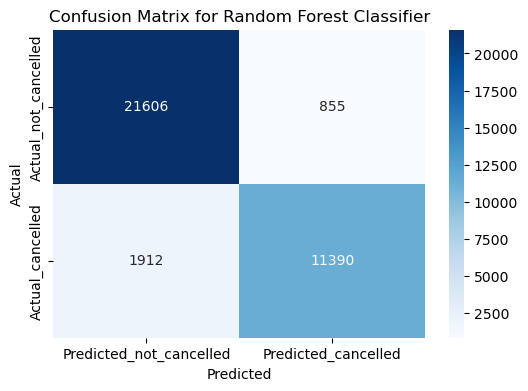

In [169]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted_not_cancelled', 'Predicted_cancelled'], yticklabels=['Actual_not_cancelled', 'Actual_cancelled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Interpretation:
    
Accuracy Score:
The overall accuracy of the model is approximately 93%, suggesting that it correctly predicts the classes for 93% of the instances in the test set.

Confusion Matrix:
1. True Negative (TN): 21937 - The number of actual negative (class 0) instances that were correctly predicted.
2. False Positive (FP): 524 - The number of actual negative instances that were incorrectly predicted as positive.
3. False Negative (FN): 1923 - The number of actual positive (class 1) instances that were incorrectly predicted as negative.
4. True Positive (TP): 11379 - The number of actual positive instances that were correctly predicted.

Classification Report:
The Random Forest model achieved an overall accuracy of approximately 93%, with precision, recall, and F1-score metrics for the two classes indicating strong predictive performance. Class 0 had a precision of 92% and recall of 98%, resulting in an F1-score of 95%, while Class 1 showed slightly higher precision at 96% but lower recall at 86%, leading to an F1-score of 90%. These results show that the model is better at identifying Class 0 instances than Class 1, with Class 0 having a higher recall.


Insight:
The Random Forest model has an impressive accuracy of about 93% on the test data. It exhibits a good balance between precision and recall, especially for Class 0. 

# XgBoost 

In [170]:
# Define hyperparameters and their respective value ranges
param_dist_xgb = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [50, 100],
    'booster': ['gbtree'],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [171]:
# Initialize the XGBClassifier with a random state
xgb = XGBClassifier(random_state=42)

# Perform RandomizedSearch for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, 
                                       n_iter=50, cv=3, n_jobs=-1, verbose=2, 
                                       scoring='accuracy', random_state=42)


In [172]:
# Fit the randomized search to the data
random_search_xgb.fit(X_train, y_train)

# Extract the best estimator from randomized search
best_xgb = random_search_xgb.best_estimator_

# Predictions using the best estimator from randomized search
y_pred_xgb = best_xgb.predict(X_test)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [175]:
# Calculate metrics for XGBoost
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_xgb = confusion_matrix(y_test, y_pred_xgb)
clf_report_xgb = classification_report(y_test, y_pred_xgb)

# Print results for XGBoost
print(f"Accuracy Score of XGB Classifier with best hyperparameters: {acc_xgb}")
print(f"Best Parameters: {random_search_xgb.best_params_}")
print(f"Confusion Matrix for XGBClassifier: \n{conf_xgb}")
print(f"Classification Report for XGBClassifier: \n{clf_report_xgb}")


Accuracy Score of XGB Classifier with best hyperparameters: 0.9023012610798871
Best Parameters: {'subsample': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8, 'booster': 'gbtree'}
Confusion Matrix for XGBClassifier: 
[[22141   320]
 [ 3174 10128]]
Classification Report for XGBClassifier: 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     22461
           1       0.97      0.76      0.85     13302

    accuracy                           0.90     35763
   macro avg       0.92      0.87      0.89     35763
weighted avg       0.91      0.90      0.90     35763



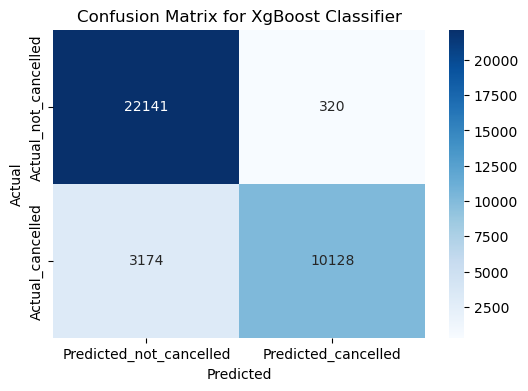

[CV] END booster=gbtree, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1; total time=   0.6s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1; total time=   0.6s
[CV] END booster=gbtree, colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END booster=gbtree, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END booster=gbtree, colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END booster=gbtree, colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1; total time=   0.4s
[CV] END booster=gbtree, colsample_bytree=1, gamm

In [177]:
# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted_not_cancelled', 'Predicted_cancelled'], yticklabels=['Actual_not_cancelled', 'Actual_cancelled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for XgBoost Classifier')
plt.show()

Interpretation:

Accuracy Score: 
The XGB Classifier with the best hyperparameters has an accuracy of 90%. This means that out of all the predictions made by the model, 90% of them were correct.

Confusion Matrix:

1. True Positives (TP):22141
2. False Negatives (FN): 320
3. False Positives (FP): 3174
4. True Negatives (TN): 10128

Classification Report:
The XGBoost model is very accurate for class 0, correctly identifying 99% of them and making correct predictions 87% of the time. For class 1, the model is highly precise (97%) but misses about 24% of actual cases, indicated by a lower recall of 76%.

Insight:
The model performs well with an overall accuracy of 90%. The XGBoost model with these parameters is performing very well, especially for the majority class (class 0). However, there could be an effort to improve recall for class 1, possibly by looking into the reasons for the false negatives or by further tuning the model.

# Models Comparison

In [178]:
# Accuracy Rate Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression',  'Decision Tree Classifier', 'Random Forest Classifier','XgBoost'],
    'Score' : [acc_lr,  acc_dtc, acc_rd_clf,  acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)


Model     Score
2  Random Forest Classifier  0.931577
1  Decision Tree Classifier  0.922630
3                   XgBoost  0.902301
0       Logistic Regression  0.805525

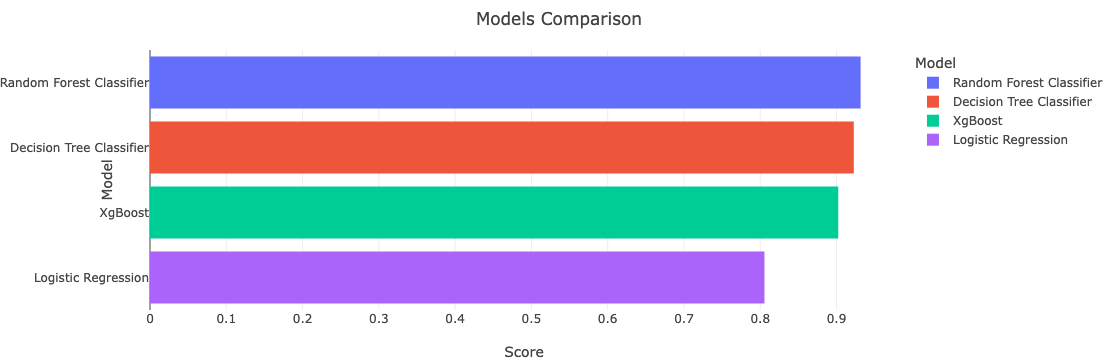

In [179]:
# Sort the models by the 'Score' column in descending order
models_sorted = models.sort_values(by='Score', ascending=False)

# Create the bar chart with the sorted DataFrame.
fig = px.bar(data_frame=models_sorted, x='Score', y='Model', color='Model', title='Models Comparison', orientation='h')

# Update layout 
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(255, 255, 255, 1)',
    'template': 'none',
    'yaxis': {
        'title': 'Model', 
        'visible': True,  
    },
    'margin': {'l': 150, 'r': 10, 't': 50, 'b': 50},  # Adjust left margin to ensure enough space for labels
})

# Show the figure
fig.show()

Based on the accuracy scores and the confusion matrices provided, the Random Forest model with the best hyperparameters is the best performing model:

1. The Random Forest model has the highest accuracy (93.16%), indicating the highest overall number of correct predictions compared to the total predictions.
2.It has a high precision for both classes (0.92 for class 0 and 0.96 for class 1), indicating a low false positive rate.
3. The model also shows a strong recall, especially for class 0 (0.98), meaning it is very good at identifying the 'not_cancelled' class.
4. The F1-scores, which balance precision and recall, are highest for the Random Forest model across both classes, highlighting its robustness.

In summary, the Random Forest model outperforms the others in terms of accuracy, precision, recall, and F1-score, making it the best choice among those provided.

In [ ]:
# Feature Importance

In [192]:
# Assuming best_rf_clf is your trained Random Forest model and X_train is your training data
feature_importances = best_rf_clf.feature_importances_

# Get the sorted indices of the feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]  # [::-1] reverses the array



In [195]:
# Get the feature names from the column names of your training dataset (assuming it's a pandas DataFrame)
sorted_feature_names = X_train.columns[sorted_indices]



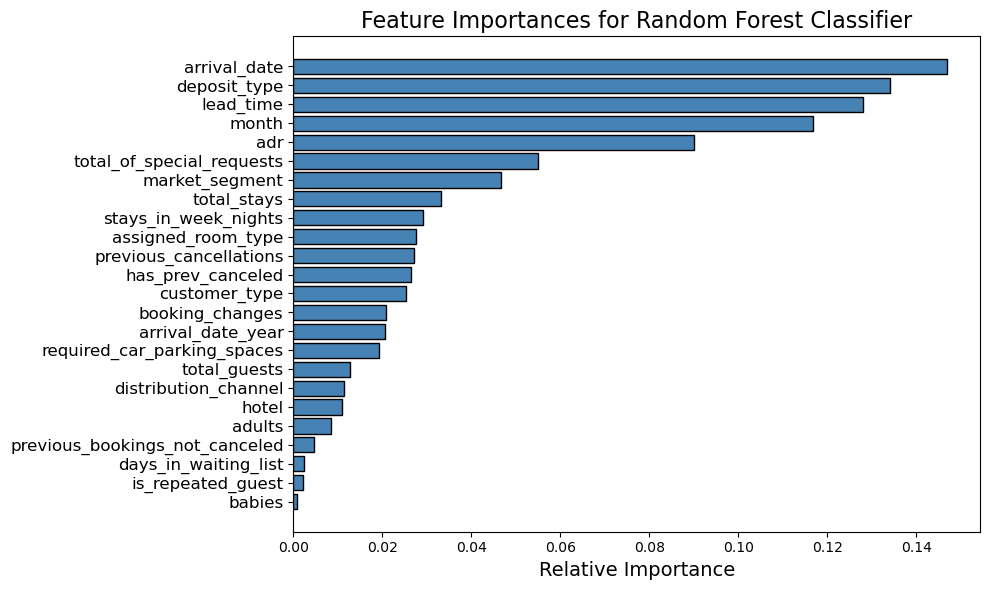

In [196]:
# Plot the feature importances
plt.figure(figsize=(10,6))
plt.title('Feature Importances for Random Forest Classifier', fontsize=16)
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center', color='steelblue', edgecolor='black')
plt.yticks(range(len(sorted_indices)), sorted_feature_names, fontsize=12)
plt.xlabel('Relative Importance', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest importance at the top
plt.tight_layout()
plt.show()

Observations:

I would like to choose top five features which might be a good balance between impact and manageability. However, certain features, despite being impactful, are not actionable (e.g., the arrival date might be hard to influence), it might be more sensible to focus on other, more manageable predictors.

1. deposit_type: The type of deposit made has a significant impact on the likelihood of cancellation, likely because a higher deposit serves as a disincentive to cancel.
2. lead_time: The time between the booking and the actual stay can influence cancellations, as plans may change over a longer period.
3.  adr (Average Daily Rate): The price paid per room night could affect cancellations, with higher or lower rates potentially influencing the decision to cancel.
4.  total_of_special_requests: Guests with more special requests may be less likely to cancel as they have specific expectations for their stay, indicating a higher commitment level.
5.  Market Segment: This refers to the type of market that the booking comes from (e.g., groups, individuals, corporate, etc.). Different market segments may have varying levels of cancellation likelihood due to their nature and contractual agreements. Strategies might involve targeting specific market segments with tailored booking terms to minimize cancellations.


However, from the correlation heatmap:

1. deposit_type (0.47)
2. lead_time (0.29)
3. previous_cancellations (0.27)
4. required_car_parking_spaces (-0.22)
5. booking_changes (-0.14)

Consider the top factors from both the correlation heatmap and the feature importances of the Random Forest Classifier model, I choose Lead Time, Deposit Type, ADR (Average Daily Rate), Total of Special Requests, Market Segment as top features.

Here's a detailed strategic approach based on the top features:
1. Lead Time: High lead times are associated with more cancellations. Hotels might consider implementing a non-refundable deposit for early bookings or a tiered cancellation fee that increases as the arrival date approaches to discourage late cancellations.
2. Deposit Type: Since the deposit type strongly correlates with cancellations, the hotel might consider requiring a deposit for all bookings or altering the deposit amount based on the risk of cancellation inferred from the booking characteristics.
3. ADR (Average Daily Rate): A higher ADR might indicate that cost is a factor in cancellations. The hotel could experiment with dynamic pricing models, early bird discounts, or value-added packages to incentivize confirmed bookings.
4. Total of Special Requests: The fewer special requests, the more likely a cancellation is. The hotel could encourage guests to personalize their stay with special requests, which may reduce the likelihood of cancellations, as guests might feel more invested in their personalized experience.
5. Market Segment: Understanding which segments have higher cancellations could help tailor marketing and deposit strategies. For example, if business travelers are less likely to cancel, then the hotel might focus on this segment during periods of high cancellation rates.

Operational Strategies to Consider:
1. Flexible Pricing: Adjusting prices based on demand and booking behavior can help maximize revenue and manage cancellations.
2. Overbooking Policy: Based on historical data and the likelihood of cancellations, the hotel might strategically overbook.
3. Personalized Communication: Send reminders and personalized offers as the arrival date gets closer, especially to those who booked early, to decrease the chance of cancellations.
4. Targeted Marketing: Focus on market segments with lower cancellation rates or tailor strategies to mitigate the factors causing cancellations in higher-risk segments.